In [1]:
import numpy as np
import cv2
import os
import glob
import math
import tensorflow as tf
from time import time
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
export_file = open('Output.txt', 'w')

In [3]:
def img_read(path):
    img_data = cv2.imread(path)
    return cv2.resize(img_data, (650, 480))

In [4]:
original_path = 'Original Images'
clear_path = 'Clear Images'

In [5]:
original_image_paths = glob.glob(original_path + "/*.jpg")
n = len(original_image_paths)

print('Original Images -', n)
print(original_image_paths[0])

Original Images - 55
Original Images\00000.JPG


In [6]:
clear_image_paths = glob.glob(clear_path + "/*.jpg")
n_clear = len(clear_image_paths)

print('Clear Images -', n_clear)
print(clear_image_paths[0])

Clear Images - 55
Clear Images\00000.JPG


In [7]:
X = []

X.append(np.expand_dims(np.zeros((480, 650, 3)), axis = 0))

model = tf.keras.models.load_model("model_output")

model.predict(X)
print()



1/1 [==============================] - 0s 201ms/step


array([[[[0.7112678 , 0.721882  , 0.71772283],
         [0.59799445, 0.604532  , 0.5963666 ],
         [0.558221  , 0.5658737 , 0.5566927 ],
         ...,
         [0.55987877, 0.56348217, 0.5553026 ],
         [0.59961146, 0.6015981 , 0.59461325],
         [0.71630883, 0.7104502 , 0.7098255 ]],

        [[0.59649694, 0.6078382 , 0.6102612 ],
         [0.41765136, 0.41619933, 0.41400188],
         [0.35183686, 0.35026848, 0.34769076],
         ...,
         [0.35501856, 0.34516203, 0.3440302 ],
         [0.42039567, 0.40992594, 0.409289  ],
         [0.60640156, 0.58674055, 0.5950404 ]],

        [[0.5575773 , 0.5709997 , 0.57378525],
         [0.35314798, 0.35251397, 0.35024595],
         [0.2734847 , 0.2726335 , 0.26997954],
         ...,
         [0.27746618, 0.26664788, 0.26577222],
         [0.35642213, 0.34502894, 0.34450018],
         [0.5686122 , 0.54696435, 0.5562436 ]],

        ...,

        [[0.55928934, 0.57304645, 0.57713735],
         [0.3570739 , 0.35509825, 0.354568  ]

In [8]:
X = []

for i in range(n):
    X.append(img_read(original_image_paths[i]))

X = np.array(X) / 255

start_time = time()
pred = model.predict(X)
end_time = time()

print("Frame No.{}".format(i))
print('Time taken for prediction =', end_time - start_time)
print('Per Frame time =', (end_time - start_time) / n)

export_file.write("Frame No.{}\n".format(i))
export_file.write("Time taken for prediction = {}\n".format(end_time - start_time))
export_file.write("Per Frame time = {}\n\n".format((end_time - start_time) / n))

2/2 [==============================] - 1s 528ms/step
Frame No.54
Time taken for prediction = 1.7145109176635742
Per Frame time = 0.03117292577570135


38

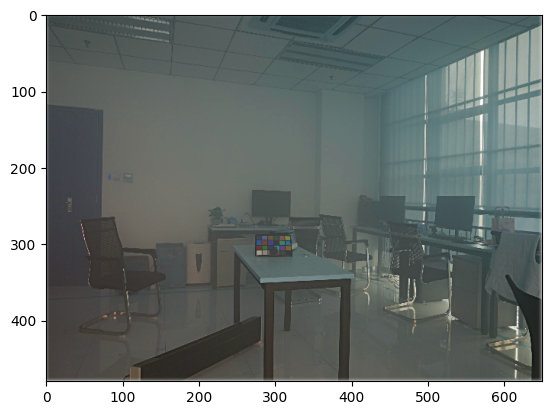

In [9]:
plt.imshow(pred[0])

In [10]:
def num_gen(x):
    if (len(x) == 1):
        return ('000' + x)
    elif (len(x) == 2):
        return ('00' + x)
    elif (len(x) == 3):
        return ('0' + x)

In [11]:
for i in range(len(pred)):
    cv2.imwrite("Predictions/" + num_gen(str(i)) + '.jpg', pred[i]*385)

In [12]:
from skimage import metrics

def ssim_function(img1,img2):
    img1_gray = cv2.cvtColor((img1*255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    img2_gray = cv2.cvtColor((img2*255).astype('uint8'), cv2.COLOR_RGB2GRAY)
    ssim_score = metrics.structural_similarity(img1_gray,img2_gray, full=True)
    return(round(ssim_score[0], 2))

In [13]:
def rms(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	err = math.sqrt(err)
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [14]:
output_img = glob.glob("Predictions/" + '*.jpg')

output_img.sort()
clear_image_paths.sort()

output_frames = []
Y = []

for path in output_img:
    output_frames.append(img_read(path))

for path in clear_image_paths:
    Y.append(img_read(path))

array_output = output_frames
output_frames = np.array(output_frames)

In [15]:
psnr = []
rms_data = []
ssim = []

print("Frame        PSNR        RMS     SSIM")
export_file.write("Frame        PSNR        RMS     SSIM\n")

for i in range(len(Y)):
    temp_clear = tf.convert_to_tensor(Y[i])
    temp_pred = tf.convert_to_tensor(output_frames[i])
    temp_psnr = tf.image.psnr(temp_clear, temp_pred, max_val=255)
    temp_rms = rms(array_output[i]/255, Y[i]/255)
    temp_ssim = ssim_function(Y[i]/255, array_output[i]/255)
    
    psnr.append(temp_psnr.numpy())
    rms_data.append(temp_rms)
    ssim.append(temp_ssim)

    print("{}       {}      {}      {}".format(i, temp_psnr, temp_rms, temp_ssim))

    export_file.write("{}       {}      {}      {}\n".format(i, temp_psnr, temp_rms, temp_ssim))

Frame        PSNR        RMS     SSIM
0       18.069866180419922      0.21630533240232075      0.82
1       18.150463104248047      0.21430751466292083      0.82
2       18.276208877563477      0.21122735088003292      0.83
3       18.31554412841797      0.21027294313406272      0.83
4       18.316150665283203      0.21025827235488784      0.83
5       18.386381149291992      0.20856501558791155      0.83
6       18.453575134277344      0.20695781759666781      0.84
7       18.45071029663086      0.20702611787879743      0.84
8       18.150209426879883      0.21431379897302158      0.84
9       18.08074188232422      0.216034719796912      0.84
10       18.452892303466797      0.20697411013979783      0.85
11       18.469371795654297      0.2065817793415248      0.85
12       18.48133659362793      0.20629742067000345      0.85
13       18.478322982788086      0.206368978878059      0.85
14       18.675384521484375      0.20173967172772103      0.85
15       18.968647003173828      0.1

In [16]:
print("Stats for PSNR")
print("Average - {}".format(mean(psnr)))
print("Max - {}".format(max(psnr)))
print("Min - {}".format(min(psnr)))

print()
print("Stats for RMS")
print("Average - {}".format(mean(rms_data)))
print("Max - {}".format(max(rms_data)))
print("Min - {}".format(min(rms_data)))

print()
print("Stats for SSIM")
print("Average - {}".format(mean(ssim)))
print("Max - {}".format(max(ssim)))
print("Min - {}".format(min(ssim)))

Stats for PSNR
Average - 19.290149688720703
Max - 21.257535934448242
Min - 18.069866180419922

Stats for RMS
Average - 0.18874102551821043
Max - 0.21630533240232075
Min - 0.1498593397015931

Stats for SSIM
Average - 0.8601818181818182
Max - 0.9
Min - 0.82


In [17]:
export_file.write("\nStats for PSNR\n")
export_file.write("Average - {}\n".format(mean(psnr)))
export_file.write("Max - {}\n".format(max(psnr)))
export_file.write("Min - {}\n\n".format(min(psnr)))

export_file.write("Stats for RMS\n")
export_file.write("Average - {}\n".format(mean(rms_data)))
export_file.write("Max - {}\n".format(max(rms_data)))
export_file.write("Min - {}\n\n".format(min(rms_data)))

export_file.write("Stats for SSIM\n")
export_file.write("Average - {}\n".format(mean(ssim)))
export_file.write("Max - {}\n".format(max(ssim)))
export_file.write("Min - {}\n".format(min(ssim)))

11

In [18]:
export_file.close()